# Weekly US Gas Prices

Let's load some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))

## Load data

In [2]:
# Let's load the data

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-01/weekly_gas_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         22360 non-null  object 
 1   fuel         22360 non-null  object 
 2   grade        22360 non-null  object 
 3   formulation  19672 non-null  object 
 4   price        22360 non-null  float64
dtypes: float64(1), object(4)
memory usage: 873.6+ KB


In [3]:
# Let's transform the 'date' column in datetime format

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.dtypes

date           datetime64[ns]
fuel                   object
grade                  object
formulation            object
price                 float64
dtype: object

In [4]:
df.head()

,date,fuel,grade,formulation,price
0,1990-08-20,gasoline,regular,all,1.191
1,1990-08-20,gasoline,regular,conventional,1.191
2,1990-08-27,gasoline,regular,all,1.245
3,1990-08-27,gasoline,regular,conventional,1.245
4,1990-09-03,gasoline,regular,all,1.242


In [5]:
print(df['fuel'].value_counts(normalize=True))
print(df['grade'].value_counts(normalize=True))
print(df['formulation'].value_counts(normalize=True))

fuel
gasoline    0.879785
diesel      0.120215
Name: proportion, dtype: float64
grade
all                 0.290966
regular             0.233542
midgrade            0.214132
premium             0.214132
ultra_low_sulfur    0.042934
low_sulfur          0.004293
Name: proportion, dtype: float64
formulation
all             0.339925
conventional    0.335553
reformulated    0.324522
Name: proportion, dtype: float64


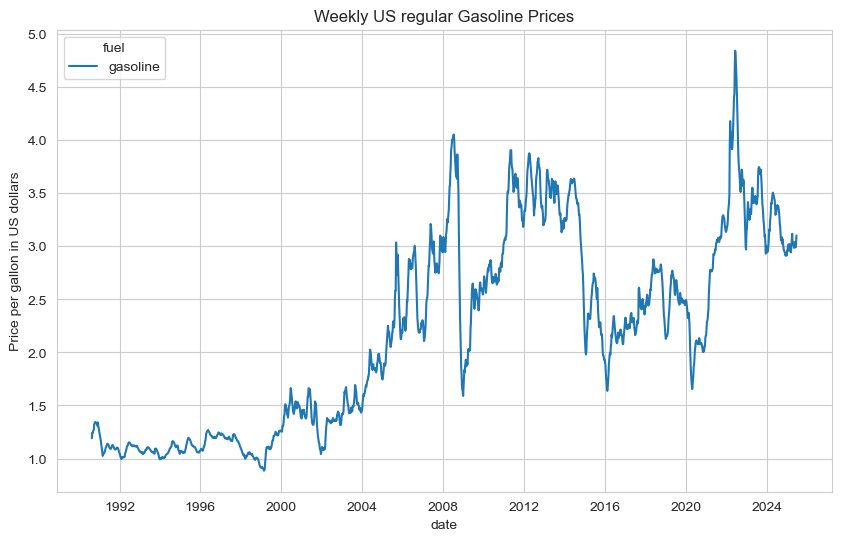

In [6]:
# Regular price of the gasoline in the last years in the US

sns.set_style('whitegrid')
sns.lineplot(data=df.query('grade == "regular" & formulation == "conventional"'),
             x='date', y='price', hue='fuel')
plt.title('Weekly US regular Gasoline Prices')
plt.ylabel('Price per gallon in US dollars');

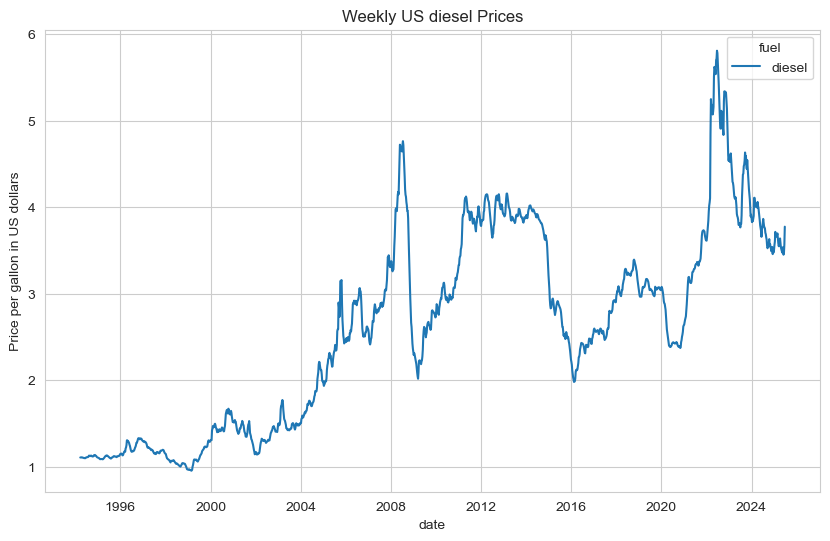

In [7]:
# Price of the diesel in the last years in the US

sns.lineplot(data=df.query('fuel == "diesel" & grade == "all"'),
             x='date', y='price', hue='fuel')
plt.title('Weekly US diesel Prices')
plt.ylabel('Price per gallon in US dollars');

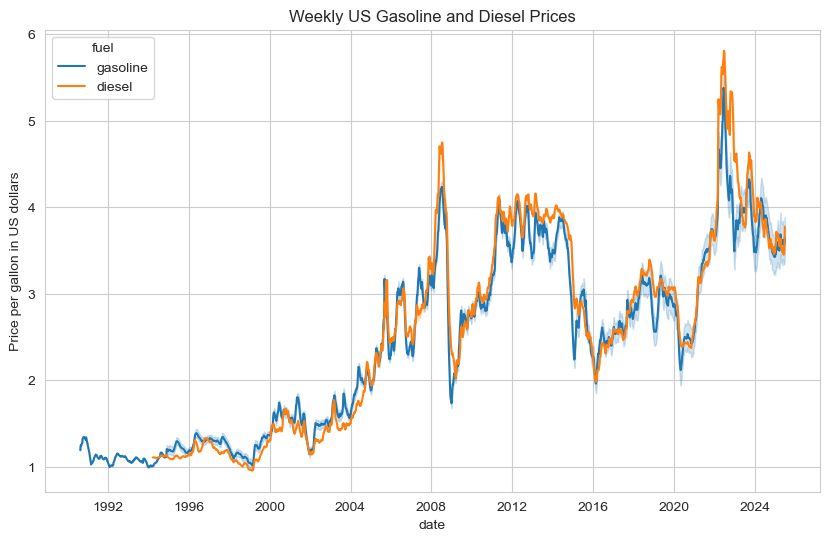

In [8]:
# Regular price of the gasoline in the last years in the US

sns.lineplot(data=df, x='date', y='price', hue='fuel')
plt.title('Weekly US Gasoline and Diesel Prices')
plt.ylabel('Price per gallon in US dollars');